# Step 1: Import important libraries

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from string import punctuation
import re # for regular expression
import string
import nltk 

In [2]:
#Read the xlsx file using read_excel build-in function in pandas 
Data_df = pd.read_excel('C:/Users/ASUS/Downloads/Saad/alldatasets.xlsx')

# Step 2: Explore that data


In [3]:
# how much data do I have?
len(Data_df)

8180

In [4]:
Data_df.shape

(8180, 18)

In [5]:
Data_df.columns

Index(['Tweet ID', 'Date', 'URL', 'Content', 'State', 'Language', 'Auther',
       'Name', 'Gender', 'Country', 'City', 'Lication from user BIO', 'Posts',
       'Post Favorite', 'Friends', 'Followers', 'Source', 'Retweeted Status'],
      dtype='object')

In [6]:
Data_df.tail(5)

,Tweet ID,Date,URL,Content,State,Language,Auther,Name,Gender,Country,City,Lication from user BIO,Posts,Post Favorite,Friends,Followers,Source,Retweeted Status
8175,1110000000000000000,2019-03-12 16:02:00,ل,RT ekramyyounis لاعب الاهلي متربي علي الرجولة ...,Positive,ar,Dodo??,Dodo83262607,Male,المملكة العربية السعودية,جدة,None,16889,1718,155,722,Twitter for Android,This is a retweet
8176,1110000000000000000,2019-03-12 16:02:00,…,RT igmIEQXFFqPeTMy الجمهور اللي تربه علي ايد ا...,Positive,ar,Anmed eissa,EissaAnmed,Male,المملكة العربية السعودية,جدة,None,1027,651,61,33,Twitter for iPhone,This is a retweet
8177,1110000000000000000,2019-03-12 16:02:00,…,RT mayamajed20 كود خصم اضافي علي نون بقيمة عل...,Other,ar,نرمين عادل??,9OgWF154CDtJfkR,Business,المملكة العربية السعودية,جدة,None,1677,1752,62,54,Twitter for Android,This is a retweet
8178,1110000000000000000,2019-03-12 16:02:00,ي,BnAli88 و الاهلي ليه ينزل لاعبين من الفريق الأ...,Positive,ar,Ammar Yasser,AmmarYa22,Male,المملكة العربية السعودية,جدة,None,87,171,304,7,Twitter for Android,Original tweet
8179,1110000000000000000,2019-03-12 16:02:00,…,RT Naiiif___511 الهلال_الدحيل\r\n\r\nالاتحاد ي...,Positive,ar,?فيصل,FsFs_911,Male,المملكة العربية السعودية,جدة,نجران,19307,528,477,511,Twitter for iPhone,This is a retweet


In [7]:
# Cleaning the last null values
Data_df=Data_df[1:8000]

In [8]:
Data_df.tail(5)

,Tweet ID,Date,URL,Content,State,Language,Auther,Name,Gender,Country,City,Lication from user BIO,Posts,Post Favorite,Friends,Followers,Source,Retweeted Status
7995,1110000000000000000,2019-03-12 16:02:00,ا,RT ahlawya88948030 لاعبي_الاهلي_رجال\r\nيلا يا...,Positive,ar,BaSmA AfIfI,6BaSmA6,Female,المملكة العربية السعودية,جدة,"السويس, مصر",9232,2783,57,232,Twitter for Android,This is a retweet
7996,1110000000000000000,2019-03-12 16:02:00,ل,RT ekramyyounis لاعب الاهلي متربي علي الرجولة ...,Positive,ar,Lolo Alaa,Lolooo15311422,Female,المملكة العربية السعودية,جدة,Cairo,6927,2074,282,397,Twitter for Android,This is a retweet
7997,1110000000000000000,2019-03-12 16:02:00,…,RT Al7iaty 11راجل ف الملعب اهلاوي\r\n90 دقيقه ...,Positive,ar,عمرو جوده,wAjCqZnF1Cf5ILD,Male,المملكة العربية السعودية,جدة,None,4008,154,927,723,Twitter for Android,This is a retweet
7998,1110000000000000000,2019-03-12 16:02:00,ر,RT k8maSkBYGy0NvnU يا رجال الاهلي استعدوا لمعر...,Positive,ar,Anmed eissa,EissaAnmed,Male,المملكة العربية السعودية,جدة,None,1013,651,61,33,Twitter for iPhone,This is a retweet
7999,1110000000000000000,2019-03-12 16:02:00,??,drWbaghdadi meccaphone1171 انت عندك حاله نفسية...,Positive,ar,Khalid,kh_khalid_kh,Male,المملكة العربية السعودية,جدة,None,4998,216,2121,687,Twitter Web App,Original tweet


In [9]:
# Print a concise summary of a DataFrame
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 1 to 7999
Data columns (total 18 columns):
Tweet ID                  7999 non-null int64
Date                      7999 non-null object
URL                       7999 non-null object
Content                   7999 non-null object
State                     7999 non-null object
Language                  7999 non-null object
Auther                    7999 non-null object
Name                      7999 non-null object
Gender                    7999 non-null object
Country                   7999 non-null object
City                      7999 non-null object
Lication from user BIO    7999 non-null object
Posts                     7999 non-null int64
Post Favorite             7999 non-null int64
Friends                   7999 non-null int64
Followers                 7999 non-null int64
Source                    7999 non-null object
Retweeted Status          7999 non-null object
dtypes: int64(5), object(13)
memory usage: 1.1+ MB


In [10]:
# number of non-NA values
Data_df.count()

Tweet ID                  7999
Date                      7999
URL                       7999
Content                   7999
State                     7999
Language                  7999
Auther                    7999
Name                      7999
Gender                    7999
Country                   7999
City                      7999
Lication from user BIO    7999
Posts                     7999
Post Favorite             7999
Friends                   7999
Followers                 7999
Source                    7999
Retweeted Status          7999
dtype: int64

In [11]:
# Retrieve number of columns
len(Data_df.columns)

18

In [12]:
Data_df.Country.unique()

array(['المملكة العربية السعودية', 'United Kingdom',
       'United Arab Emirates', 'Kingdom of Saudi Arabia'], dtype=object)

In [13]:
Data_df['Country']= np.where(Data_df['Country']=="المملكة العربية السعودية",'Kingdom of Saudi Arabia', Data_df['Country'])

In [14]:
tweets_by_country = Data_df['Country'].value_counts()

In [15]:
tweets_by_country

Kingdom of Saudi Arabia    7832
United Kingdom              141
United Arab Emirates         26
Name: Country, dtype: int64

In [16]:
# Changing it to appropriate DataTypes
Data_df['State']=Data_df['State'].astype(str)
Data_df['Language']=Data_df['Language'].astype(str)
Data_df['Auther']=Data_df['Auther'].astype(str)
Data_df['Name']=Data_df['Name'].astype(str)
Data_df['URL']=Data_df['URL'].astype(str)
Data_df['Gender']=Data_df['Gender'].astype(str)
Data_df['Country']=Data_df['Country'].astype(str)
Data_df['City']=Data_df['City'].astype(str)
Data_df['Source']=Data_df['Source'].astype(str)
Data_df['Retweeted Status']=Data_df['Retweeted Status'].astype(str)
Data_df['Tweet ID']=Data_df['Tweet ID'].astype(int)
Data_df['Posts']=Data_df['Posts'].astype(int)
Data_df['Post Favorite']=Data_df['Post Favorite'].astype(int)
Data_df['Friends']=Data_df['Friends'].astype(int)
Data_df['Followers']=Data_df['Followers'].astype(int)
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 1 to 7999
Data columns (total 18 columns):
Tweet ID                  7999 non-null int32
Date                      7999 non-null object
URL                       7999 non-null object
Content                   7999 non-null object
State                     7999 non-null object
Language                  7999 non-null object
Auther                    7999 non-null object
Name                      7999 non-null object
Gender                    7999 non-null object
Country                   7999 non-null object
City                      7999 non-null object
Lication from user BIO    7999 non-null object
Posts                     7999 non-null int32
Post Favorite             7999 non-null int32
Friends                   7999 non-null int32
Followers                 7999 non-null int32
Source                    7999 non-null object
Retweeted Status          7999 non-null object
dtypes: int32(5), object(13)
memory usage: 968.7+ KB

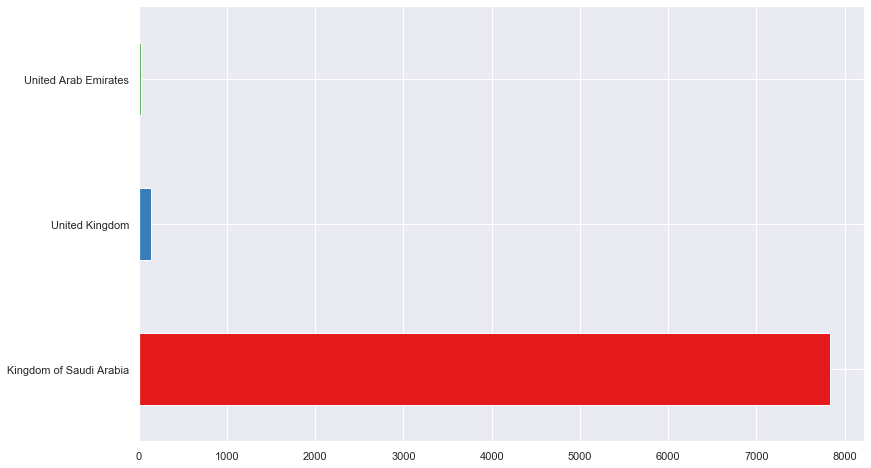

In [17]:
# visualize the results
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']

sns.set(rc={'figure.figsize':(13,8)})

tweets_by_country.plot(kind='barh', color = colors)

In [18]:
Data_df['Source'].value_counts()

Twitter for iPhone             4110
Twitter for Android            3161
Twitter Web Client              372
IFTTT                           147
Twitter Web App                  84
Twitter for iPad                 35
Tweetbot for i?S                 19
تطبيق تدبُّر                     15
Twitter Media Studio             10
TweetDeck                        10
Tweetbot for iΟS                  6
Facebook                          5
WordPress.com                     4
Mobile Web (M2)                   4
dlvr.it                           2
Flamingo for Android              2
AlAhramGate                       1
Twidere for Android #8            1
Echofon                           1
Liban8.com                        1
algerie24heures                   1
Gateapplication                   1
adwaalwatan                       1
Talon Android                     1
adensportposter                   1
n-alshar3                         1
Social Backlinks publishing       1
riadayoum                   

In [19]:
Tweet_status = Data_df["Retweeted Status"].value_counts()

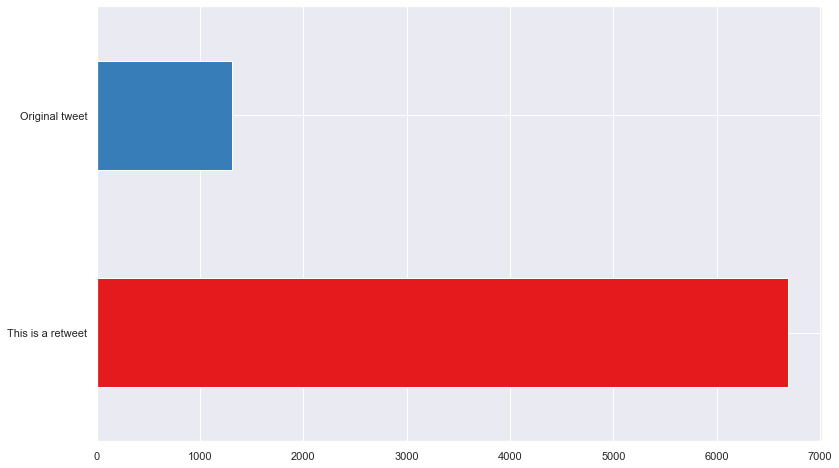

In [20]:
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']

Tweet_status.plot(kind='barh',color = colors)

In [21]:
# Cleaning the records to unifed labels for all the cities
Data_df['City']= np.where(Data_df['City']=="القريات",'Qurayyat', Data_df['City'])
Data_df['City']= np.where(Data_df['City']=="الدمام",'Dammam', Data_df['City'])
Data_df['City']= np.where(Data_df['City']=="أحد رفيدة",'Ahad Rafidah', Data_df['City'])
Data_df['City']= np.where(Data_df['City']=="تثليث",'Tathlith', Data_df['City'])
Data_df['City']= np.where(Data_df['City']=="الرياض",'Riyadh', Data_df['City'])
Data_df['City']= np.where(Data_df['City']=="حقل",'Haql', Data_df['City'])
Data_df['City']= np.where(Data_df['City']=="حائل",'Hail', Data_df['City'])
Data_df['City']= np.where(Data_df['City']=="جدة",'Jeddah', Data_df['City'])
Data_df['City']= np.where(Data_df['City']=="عفيف",'ِAffef', Data_df['City'])

In [22]:
tweets_by_state = Data_df['City'].value_counts()

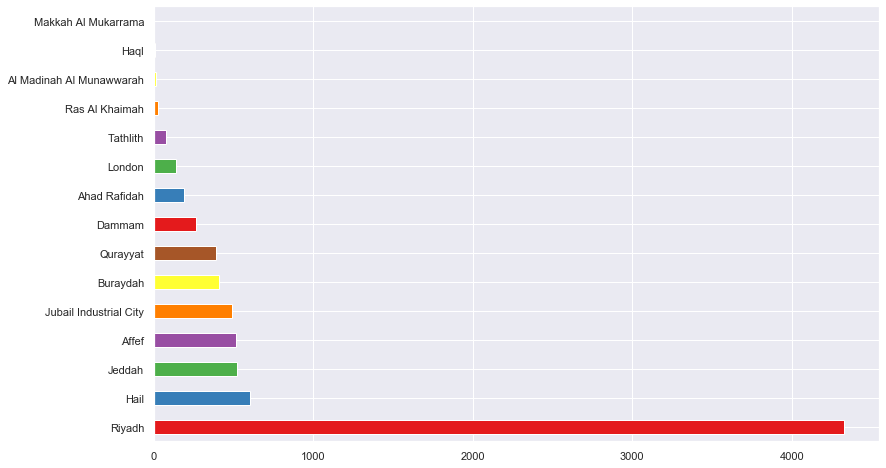

In [23]:
# visualize the results by another way
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']

tweets_by_state.plot(kind='barh', color = colors)

# Q: What is the distribution of State?


In [24]:
Data_df['State'][:30]

1     Negative
2        Other
3        Other
4     Positive
5     Positive
6     Positive
7     Positive
8     Positive
9     Positive
10    Positive
11    Positive
12    Positive
13    Negative
14       Other
15    Positive
16    Positive
17    Negative
18    Positive
19    Positive
20    Positive
21    Positive
22    Positive
23    Positive
24    Positive
25    Positive
26    Positive
27      Nutral
28    Positive
29       Other
30    Positive
Name: State, dtype: object

In [25]:
tweets_by_State = Data_df['State'].value_counts()

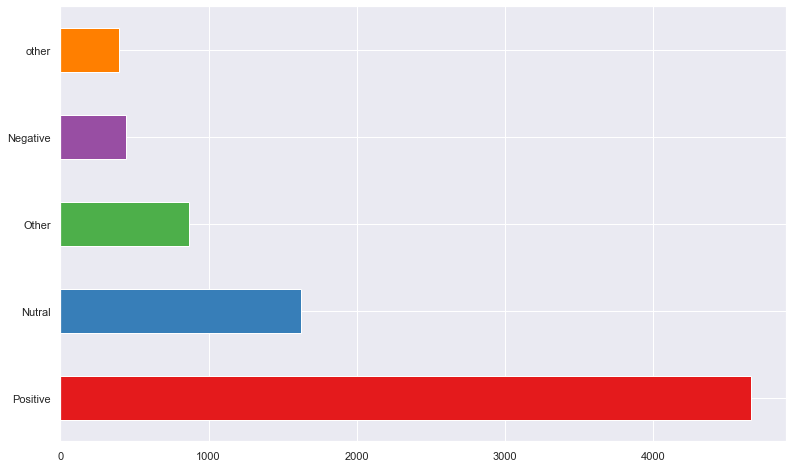

In [26]:
# visualize the results in a better way!
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']

tweets_by_State.plot(kind='barh', color = colors)

In [27]:
Data_df['State'] = Data_df['State'].map({'Negative':'Negative','Positive': "Positive",'Other':'Other', 'other':'Other', 'Nutral':'Neutral'})

In [28]:
tweets_by_State_new = Data_df['State'].value_counts()

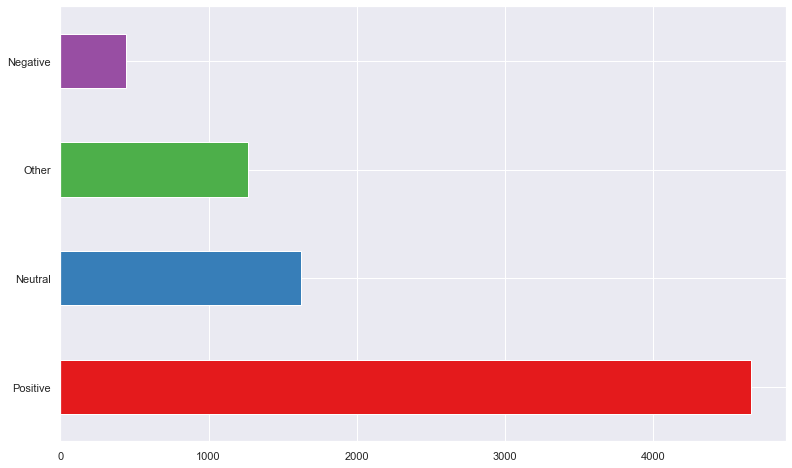

In [29]:
# visualize the results in a better way!
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']

tweets_by_State_new.plot(kind='barh', color = colors)

# Q: What is the distribution of gender?


In [30]:
Tweet_by_Gender = Data_df['Gender'].value_counts()

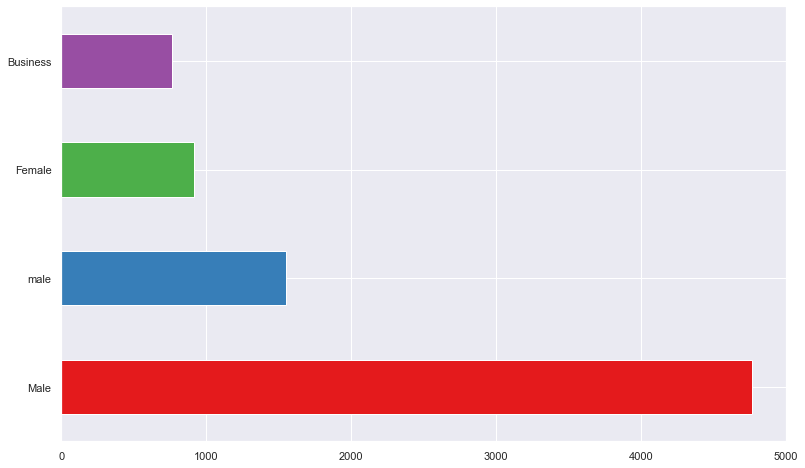

In [31]:
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']

Tweet_by_Gender.plot(kind='barh', color = colors)

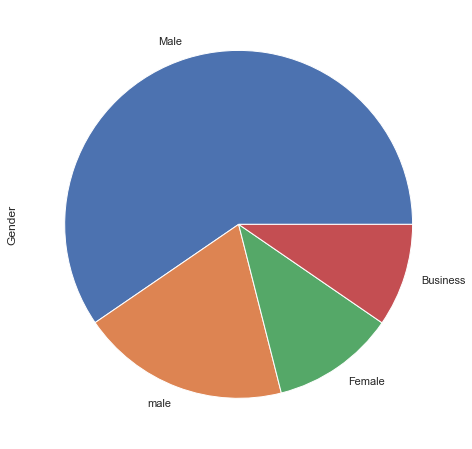

In [32]:
Tweet_by_Gender.plot(kind='pie')

In [33]:
Data_df['Gender'] = Data_df['Gender'].map({'Female':'Female','Male': "Male",'male':'Male', 'Business':'Business'})

In [34]:
tweets_by_gender_new = Data_df['Gender'].value_counts()

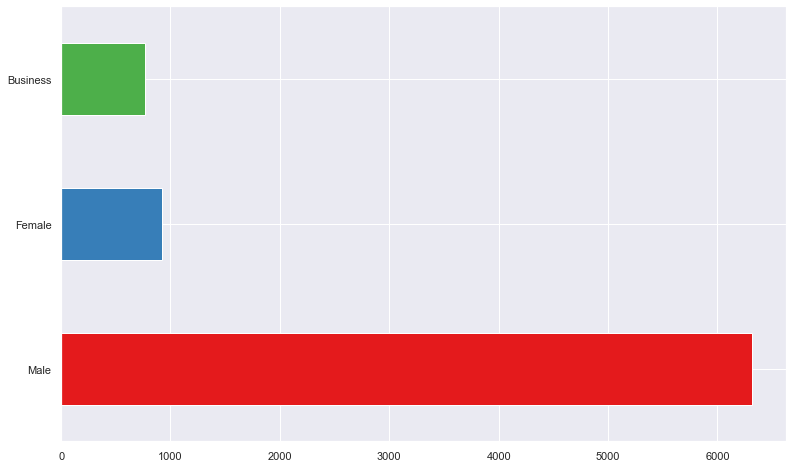

In [35]:
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']

tweets_by_gender_new.plot(kind='barh', color = colors)

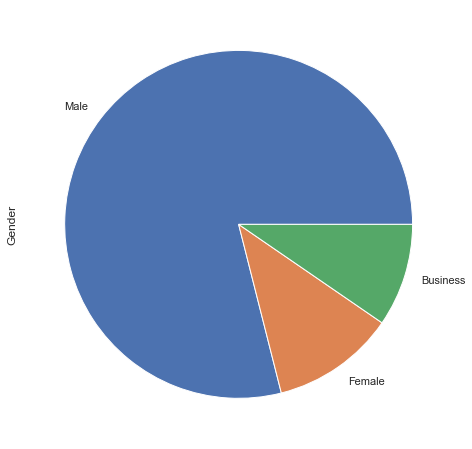

In [36]:
# visualize the results
tweets_by_gender_new.plot(kind='pie')

# Step 5.a: Clean the data

In [37]:
# Any missing values?
Data_df.isnull().values.any()

False

In [38]:
# Total missing values for each feature
Data_df.isnull().sum()

Tweet ID                  0
Date                      0
URL                       0
Content                   0
State                     0
Language                  0
Auther                    0
Name                      0
Gender                    0
Country                   0
City                      0
Lication from user BIO    0
Posts                     0
Post Favorite             0
Friends                   0
Followers                 0
Source                    0
Retweeted Status          0
dtype: int64

#### There will be Na for the column 'State' there are 2895 missing values. Becuse of Natural and other


In [39]:
# second option is to drop these values
Data_df.State.dropna()

1       Negative
2          Other
3          Other
4       Positive
5       Positive
6       Positive
7       Positive
8       Positive
9       Positive
10      Positive
11      Positive
12      Positive
13      Negative
14         Other
15      Positive
16      Positive
17      Negative
18      Positive
19      Positive
20      Positive
21      Positive
22      Positive
23      Positive
24      Positive
25      Positive
26      Positive
27       Neutral
28      Positive
29         Other
30      Positive
          ...   
7970    Positive
7971    Positive
7972    Positive
7973    Positive
7974    Positive
7975    Positive
7976    Positive
7977    Positive
7978    Positive
7979       Other
7980    Positive
7981    Positive
7982       Other
7983    Positive
7984    Positive
7985    Positive
7986    Positive
7987       Other
7988    Positive
7989    Negative
7990       Other
7991    Positive
7992    Positive
7993     Neutral
7994    Positive
7995    Positive
7996    Positive
7997    Positi

# Step 5.b: Preprocess the text


In [40]:
# check the new column
Data_df.head(5)

,Tweet ID,Date,URL,Content,State,Language,Auther,Name,Gender,Country,City,Lication from user BIO,Posts,Post Favorite,Friends,Followers,Source,Retweeted Status
1,82706432,2019-02-19 09:51:00,https://t.co/n8StxsORUi,خاطفينه هلاليين الله حسيبهم,Negative,ar,ًالجهني??,z7k_t,Female,Kingdom of Saudi Arabia,Haql,نادي الهلال,6065,2959,98,266,Twitter for iPhone,This is a retweet
2,82706432,2019-02-19 09:51:00,…,RT DomingoSohayla ماراثون التخفيضات من نون ش...,Other,ar,مِحً ـمِدُ عَ ـفاش(بّن قَحطٌـآن),Bn_3afash,Business,Kingdom of Saudi Arabia,Haql,النبض صنعاء وفي المكلا انفاسي,89981,9391,3935,16993,Twitter for Android,This is a retweet
3,82706432,2019-02-19 09:51:00,…,RT amar_hamad بحضوركم_نصر_اسيا_راجع\r\n\r\nمعل...,Other,ar,العنيد,Abdulrahman532,Male,Kingdom of Saudi Arabia,Haql,None,421,37,299,26,Twitter for iPhone,This is a retweet
4,82706432,2019-02-19 09:51:00,https://t.co/n8StxsORUi,RT Alhilal_FC هلا بالأسد \r\n\r\nالهلال http...,Positive,ar,نوال ????‍??,J8Nawal,Female,Kingdom of Saudi Arabia,Haql,None,2445,1969,676,246,Twitter for iPhone,This is a retweet
5,82706432,2019-02-19 09:51:00,https://t.co/AkhqtNGWU3,RT Alhilal_FC تطعيس \r\n \r\nالهلال httpstcoA...,Positive,ar,Faleh Alarjani,br__br0,Male,Kingdom of Saudi Arabia,Haql,None,844,990,184,52,Twitter for iPhone,This is a retweet


In [41]:
Data_df['Content']= Data_df['Content'].str.replace("[({':]", "")

Data_df.Content = Data_df.Content.str.replace(r"@#[A-Za-z0-9]", " ")
Data_df.Content = Data_df.Content.str.replace(r"[ِa-zA-Z0-9؟?]", " ")
Data_df.Content = Data_df.Content.str.replace(r"[ِ\r\n]", " ")
Data_df.Content = Data_df.Content.str.replace(r"[ِ_]", " ")
Data_df.Content = Data_df.Content.str.replace(r"\s+", " ")



In [42]:
Data_df.head(5)

,Tweet ID,Date,URL,Content,State,Language,Auther,Name,Gender,Country,City,Lication from user BIO,Posts,Post Favorite,Friends,Followers,Source,Retweeted Status
1,82706432,2019-02-19 09:51:00,https://t.co/n8StxsORUi,خاطفينه هلاليين الله حسيبهم,Negative,ar,ًالجهني??,z7k_t,Female,Kingdom of Saudi Arabia,Haql,نادي الهلال,6065,2959,98,266,Twitter for iPhone,This is a retweet
2,82706432,2019-02-19 09:51:00,…,ماراثون التخفيضات من نون شغال الحق فرصتك بالش...,Other,ar,مِحً ـمِدُ عَ ـفاش(بّن قَحطٌـآن),Bn_3afash,Business,Kingdom of Saudi Arabia,Haql,النبض صنعاء وفي المكلا انفاسي,89981,9391,3935,16993,Twitter for Android,This is a retweet
3,82706432,2019-02-19 09:51:00,…,بحضوركم نصر اسيا راجع معلومة تهمك لعب النصر ف...,Other,ar,العنيد,Abdulrahman532,Male,Kingdom of Saudi Arabia,Haql,None,421,37,299,26,Twitter for iPhone,This is a retweet
4,82706432,2019-02-19 09:51:00,https://t.co/n8StxsORUi,هلا بالأسد الهلال,Positive,ar,نوال ????‍??,J8Nawal,Female,Kingdom of Saudi Arabia,Haql,None,2445,1969,676,246,Twitter for iPhone,This is a retweet
5,82706432,2019-02-19 09:51:00,https://t.co/AkhqtNGWU3,تطعيس الهلال,Positive,ar,Faleh Alarjani,br__br0,Male,Kingdom of Saudi Arabia,Haql,None,844,990,184,52,Twitter for iPhone,This is a retweet


In [43]:
Data_df['State'] = Data_df['State'].map({'Positive': 1, 'Negative': 0}) 

In [44]:
Data_df=Data_df[Data_df['State'] != "Neutral"]

C:\Users\ASUS\Anaconda3\Anaconda_New\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [45]:
Data_df=Data_df[Data_df['State'] != "Other"]
Data_df=Data_df[Data_df['State'] != "other"]

In [46]:
# Any missing values?
Data_df.isnull().values.any()

True

In [47]:
# Total missing values for each feature
Data_df.isnull().sum()

Tweet ID                     0
Date                         0
URL                          0
Content                      0
State                     2895
Language                     0
Auther                       0
Name                         0
Gender                       0
Country                      0
City                         0
Lication from user BIO       0
Posts                        0
Post Favorite                0
Friends                      0
Followers                    0
Source                       0
Retweeted Status             0
dtype: int64

In [48]:
Data_df.dropna(axis=0,inplace=True)

In [49]:
Data_df['State']=Data_df['State'].astype(int)

In [50]:
# Any missing values?
Data_df.isnull().values.any()

False

In [51]:
# Total missing values for each feature
Data_df.isnull().sum()

Tweet ID                  0
Date                      0
URL                       0
Content                   0
State                     0
Language                  0
Auther                    0
Name                      0
Gender                    0
Country                   0
City                      0
Lication from user BIO    0
Posts                     0
Post Favorite             0
Friends                   0
Followers                 0
Source                    0
Retweeted Status          0
dtype: int64

In [52]:
Data_df.shape

(5104, 18)

In [53]:
data= Data_df['Content']
target= Data_df['State']

# Step 6: ML Classification  


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [74]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape
print(X)

  (0, 3729)	0.5650236403989866
  (0, 6849)	0.5262345691151278
  (0, 1784)	0.29081566300453854
  (0, 3625)	0.5650236403989866
  (1, 6843)	0.6601774622077193
  (1, 2373)	0.6601774622077193
  (1, 2095)	0.3582337739325406
  (2, 2095)	0.43165767099541996
  (2, 3169)	0.9020375020312681
  (3, 2095)	0.210183362230696
  (3, 1344)	0.38805151464615234
  (3, 6189)	0.5193971261791829
  (3, 2306)	0.5193971261791829
  (3, 1856)	0.5154534187061319
  (4, 2095)	0.18435580089667783
  (4, 5154)	0.4338287782262267
  (4, 8086)	0.5944942794178525
  (4, 5143)	0.5611576490191317
  (4, 3495)	0.3308839291129948
  (5, 2095)	0.07744087672410957
  (5, 787)	0.099497458432482
  (5, 809)	0.2473647490657292
  (5, 8513)	0.323395955339508
  (5, 3897)	0.19843265280815237
  (5, 3722)	0.29805221991491515
  :	:
  (5101, 7155)	0.23653539832050127
  (5101, 6543)	0.24241091179968297
  (5101, 1689)	0.2688304878080439
  (5101, 3951)	0.23653539832050127
  (5101, 1962)	0.3021993212941448
  (5102, 921)	0.1094249243811007
  (5102, 62

In [71]:
X.head(5)

AttributeError: head not found

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size=0.70, random_state=42)

In [76]:
Data_df.head(5)

,Tweet ID,Date,URL,Content,State,Language,Auther,Name,Gender,Country,City,Lication from user BIO,Posts,Post Favorite,Friends,Followers,Source,Retweeted Status
1,82706432,2019-02-19 09:51:00,https://t.co/n8StxsORUi,خاطفينه هلاليين الله حسيبهم,0,ar,ًالجهني??,z7k_t,Female,Kingdom of Saudi Arabia,Haql,نادي الهلال,6065,2959,98,266,Twitter for iPhone,This is a retweet
4,82706432,2019-02-19 09:51:00,https://t.co/n8StxsORUi,هلا بالأسد الهلال,1,ar,نوال ????‍??,J8Nawal,Female,Kingdom of Saudi Arabia,Haql,None,2445,1969,676,246,Twitter for iPhone,This is a retweet
5,82706432,2019-02-19 09:51:00,https://t.co/AkhqtNGWU3,تطعيس الهلال,1,ar,Faleh Alarjani,br__br0,Male,Kingdom of Saudi Arabia,Haql,None,844,990,184,52,Twitter for iPhone,This is a retweet
6,82706432,2019-02-19 09:51:00,https://t.co/91PEyAxR6J,الزعماء مستمتعين بأجواء المخيم الهلال,1,ar,7A•,Hanan_HFC90,Female,Kingdom of Saudi Arabia,Haql,Alhilal,1393,50,76,91,Twitter for iPhone,This is a retweet
7,82706432,2019-02-19 09:51:00,https://t.co/rHGiYdkfck,قوميز يبغى قهوه جمهور الهلال,1,ar,كاااارلوس 19??,wail05379,Male,Kingdom of Saudi Arabia,Haql,None,14861,16636,964,967,Twitter for Android,This is a retweet


In [77]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3572, 8587) (1532, 8587) (3572,) (1532,)


# Classifier 1: SVM


In [78]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))

#do a 10 fold cross-validation 
results_svm = cross_val_score(classifier_svm, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_svm)

print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))

print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))


print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")

SVM accuracy: 0.95

10-fold cross-validation:
[0.92578125 0.93359375 0.9254902  0.95294118 0.94901961 0.93921569
 0.93529412 0.95294118 0.94705882 0.96078431]
The average accuracy of the SVM classifier is : 0.94

Confusion matrix of the SVM classifier:
[[  54   71]
 [   5 1402]]

Classification_report of SVM classifier:
              precision    recall  f1-score   support

           0       0.92      0.43      0.59       125
           1       0.95      1.00      0.97      1407

    accuracy                           0.95      1532
   macro avg       0.93      0.71      0.78      1532
weighted avg       0.95      0.95      0.94      1532

----------------------------------------------------------------------------


In [79]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

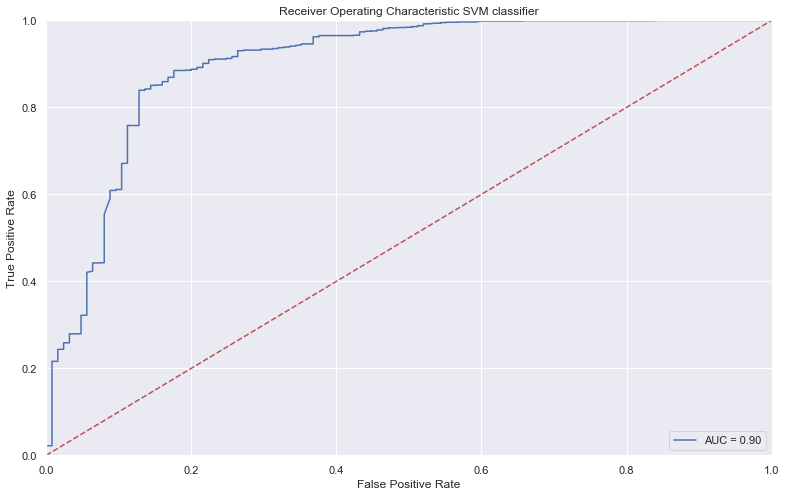

In [80]:
# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Classifier 2: Logistic 

In [81]:
# build the second classifer, logsitic regrssion 
classifier_log =  LogisticRegression().fit(X_train,y_train)

C:\Users\ASUS\Anaconda3\Anaconda_New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
print("Logisitic Accuracy: %.2F"%classifier_log.score(X_test, y_test))
results_log = cross_val_score(classifier_log, X,target, cv=10)


print("\n10-fold cross-validation:")
print(results_log)


print("The average accuracy of the Logisitic classifier is : %.2f" % np.mean(results_log))
print("\nConfusion matrix of the Logisitic classifier:")
predicted_log= classifier_log.predict(X_test)
print(confusion_matrix(y_test,predicted_log))


print("\nClassification_report of Logisitic classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

C:\Users\ASUS\Anaconda3\Anaconda_New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logisitic Accuracy: 0.94

10-fold cross-validation:
[0.91601562 0.91210938 0.91568627 0.9372549  0.93137255 0.9372549
 0.93529412 0.94313725 0.93529412 0.91372549]
The average accuracy of the Logisitic classifier is : 0.93

Confusion matrix of the Logisitic classifier:
[[  30   95]
 [   0 1407]]

Classification_report of Logisitic classifier:
              precision    recall  f1-score   support

           0       1.00      0.24      0.39       125
           1       0.94      1.00      0.97      1407

    accuracy                           0.94      1532
   macro avg       0.97      0.62      0.68      1532
weighted avg       0.94      0.94      0.92      1532

----------------------------------------------------------------------------


In [83]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

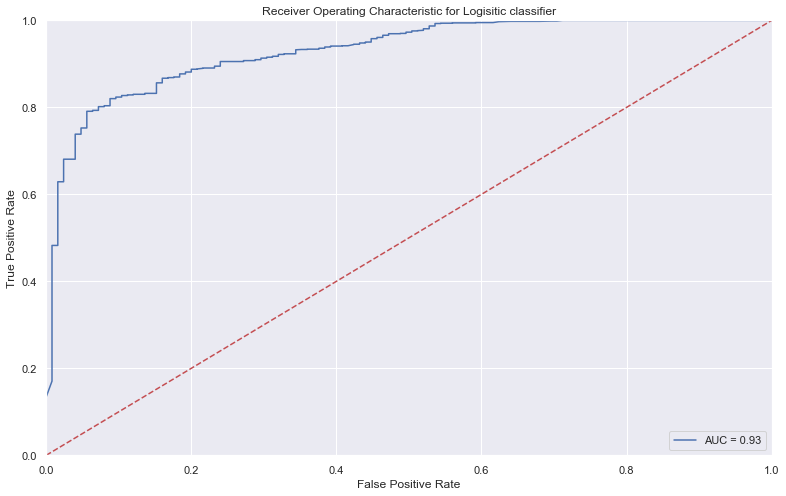

In [84]:
# polt AUC
plt.title('Receiver Operating Characteristic for Logisitic classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Most informative features


In [85]:
def most_informative_feature(vectorizer, classifier, top_features=10):
    
    feature_names = vectorizer.get_feature_names()
    svm_coef = classifier.coef_.toarray() 
    
    top_positive_coefficients = sorted(zip(svm_coef[0], feature_names))[-top_features:]
    top_negative_coefficients = sorted(zip(svm_coef[0], feature_names))[:top_features]
    
    print ("Top Positive Coefficients")
    print ("==========================")
    for coef, feat in top_positive_coefficients:
        print (feat, coef)
        
    print ("")
    print ("Top Negative Coefficients")
    print ("==========================")
    for coef, feat in top_negative_coefficients:
        print (feat, coef)       

In [86]:
# show the most informatics features for the svm classifier 
most_informative_feature(tf_vec,classifier_svm)

Top Positive Coefficients
مبروك 0.564519732063198
سابقا 0.5689966656823271
سييرا 0.5749704869926177
كانت 0.5797567480604124
واثق 0.5942070858596188
الحزم 0.6065283243240328
فاز 0.6201971843946024
طبعا 0.6578523941780229
حمدالله 0.676245082153575
الاهلي 0.7099480706978589

Top Negative Coefficients
فقراوي -2.3502431975005638
طرد -1.8235721386774455
طائرة -1.4315739471382527
الدفع -1.2882677284137163
تركي -1.1743569085571512
الرباعي -1.159860423038815
الفاشل -1.1331118508831897
المليطي -1.1331118508831897
شاهين -1.1331118508831897
حال -1.1158176467038343


# Classifier 2: naive_bayes 

In [87]:
classifier_naive_bayes = naive_bayes.MultinomialNB()
classifier_naive_bayes.fit(X_train,y_train)

print("naive_bayes accuracy: %.2f"%classifier_naive_bayes.score(X_test, y_test))

#do a 10 fold cross-validation 
results_naive_bayes = cross_val_score(classifier_naive_bayes, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_naive_bayes)

print("The average accuracy of the naive_bayes classifier is : %.2f" % np.mean(results_naive_bayes))

print("\nConfusion matrix of the naive_bayes classifier:")
predicted_naive_bayes = classifier_naive_bayes.predict(X_test)
print(confusion_matrix(y_test,predicted_naive_bayes))


print("\nClassification_report of naive_bayes classifier:")
print(classification_report(y_test,predicted_naive_bayes))
print("----------------------------------------------------------------------------")

naive_bayes accuracy: 0.94

10-fold cross-validation:
[0.91992188 0.91210938 0.91960784 0.93137255 0.92941176 0.92745098
 0.93137255 0.9372549  0.92941176 0.91372549]
The average accuracy of the naive_bayes classifier is : 0.93

Confusion matrix of the naive_bayes classifier:
[[  29   96]
 [   0 1407]]

Classification_report of naive_bayes classifier:
              precision    recall  f1-score   support

           0       1.00      0.23      0.38       125
           1       0.94      1.00      0.97      1407

    accuracy                           0.94      1532
   macro avg       0.97      0.62      0.67      1532
weighted avg       0.94      0.94      0.92      1532

----------------------------------------------------------------------------
